## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


In [51]:
#Import all the necessary modules

# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split
import numpy as np

# calculate accuracy measures and confusion matrix
from sklearn import metrics

from sklearn import preprocessing

In [52]:
colnames = ["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","guardian","traveltime","studytime","failures","schoolsup","famsup","paid","activities","nursery","higher","internet","romantic","famrel","freetime","goout","Dalc","Walc","health","absences","G1","G2","G3"]

studperf_df = pd.read_csv("students-data.csv", sep = ';' , names = colnames , skiprows = 1)

## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [53]:
studperf_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [54]:
studperf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

## Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [55]:
studperf_df.index

RangeIndex(start=0, stop=395, step=1)

In [56]:
studperf_df.index.names = ['Number']

In [57]:
pd.isna(studperf_df)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
Number,,,,,,,,,,,,,,,,,,,,,
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [58]:
studperf_df[~studperf_df.applymap(np.isreal).all(1)]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
Number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19


## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [59]:
studperf_df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [60]:
studperf_df.select_dtypes(include=[ 'int64'])

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
Number,,,,,,,,,,,,,,,,
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10
5,16,4,3,1,2,0,5,4,2,1,2,5,10,15,15,15
6,16,2,2,1,2,0,4,4,4,1,1,3,0,12,12,11
7,17,4,4,2,2,0,4,1,4,1,1,1,6,6,5,6
8,15,3,2,1,2,0,4,2,2,1,1,1,0,16,18,19


In [61]:
studperf_df.select_dtypes(exclude=[ 'int64'])

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
Number,,,,,,,,,,,,,,,,,
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no
5,GP,M,U,LE3,T,services,other,reputation,mother,no,yes,yes,yes,yes,yes,yes,no
6,GP,M,U,LE3,T,other,other,home,mother,no,no,no,no,yes,yes,yes,no
7,GP,F,U,GT3,A,other,teacher,home,mother,yes,yes,no,no,yes,yes,no,no
8,GP,M,U,LE3,A,services,other,home,mother,no,yes,yes,no,yes,yes,yes,no


In [62]:
studperf_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
traveltime,395.0,1.448101,0.697505,1.0,1.0,1.0,2.0,4.0
studytime,395.0,2.035443,0.839240,1.0,1.0,2.0,2.0,4.0
failures,395.0,0.334177,0.743651,0.0,0.0,0.0,0.0,3.0
famrel,395.0,3.944304,0.896659,1.0,4.0,4.0,5.0,5.0
freetime,395.0,3.235443,0.998862,1.0,3.0,3.0,4.0,5.0
goout,395.0,3.108861,1.113278,1.0,2.0,3.0,4.0,5.0
Dalc,395.0,1.481013,0.890741,1.0,1.0,1.0,2.0,5.0


In [63]:
studperf_df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
school,395,2,GP,349,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,395,2,F,208,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,395,NaN,NaN,NaN,16.6962,1.27604,15,16,17,18,22
address,395,2,U,307,NaN,NaN,NaN,NaN,NaN,NaN,NaN
famsize,395,2,GT3,281,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pstatus,395,2,T,354,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Medu,395,NaN,NaN,NaN,2.74937,1.09474,0,2,3,4,4
Fedu,395,NaN,NaN,NaN,2.52152,1.0882,0,2,2,3,4
Mjob,395,5,other,141,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fjob,395,5,other,217,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [79]:
studperfVAR_df = studperf_df.select_dtypes(include=[ 'int64'])
studperfVAR_df.var() 

age            1.628285
Medu           1.198445
Fedu           1.184180
traveltime     0.486513
studytime      0.704324
failures       0.553017
famrel         0.803997
freetime       0.997725
goout          1.239388
Dalc           0.793420
Walc           1.658678
health         1.932944
absences      64.049541
G1            11.017053
G2            14.148917
G3            20.989616
dtype: float64

In [72]:
print(studperfVAR_df.var() < 1)

age           False
Medu          False
Fedu          False
traveltime     True
studytime      True
failures       True
famrel         True
freetime       True
goout         False
Dalc           True
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool


In [73]:
studperfVAR_df.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')

In [80]:
studperfVAR_df.drop(['traveltime' , 'studytime', 'failures', 'famrel', 'freetime', 'Dalc'], axis=1,inplace=True)

In [81]:
studperfVAR_df.columns

Index(['age', 'Medu', 'Fedu', 'goout', 'Walc', 'health', 'absences', 'G1',
       'G2', 'G3'],
      dtype='object')

# Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

3 age - student's age (numeric: from 15 to 22)

7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 -5th to 9th grade, 3 - secondary education or 4 - higher education)

8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)

26 goout - going out with friends (numeric: from 1 - very low to 5 - very high) 

28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high) 

29 health - current health status (numeric: from 1 - very bad to 5 - very good) 

30 absences - number of school absences (numeric: from 0 to 93) 


# These grades are related with the course subject, Math or Portuguese:

31 G1 - first period grade (numeric: from 0 to 20)

31 G2 - second period grade (numeric: from 0 to 20)

32 G3 - final grade (numeric: from 0 to 20, output target)


In [82]:
studperfVAR_df.head()

,age,Medu,Fedu,goout,Walc,health,absences,G1,G2,G3
Number,,,,,,,,,,
0,18,4,4,4,1,3,6,5,6,6
1,17,1,1,3,1,3,4,5,5,6
2,15,1,1,2,3,3,10,7,8,10
3,15,4,2,2,1,5,2,15,14,15
4,16,3,3,2,2,5,4,6,10,10


In [83]:
studperfVAR_df[['Medu', 'Fedu', 'goout', 'Walc', 'health']].head()

,Medu,Fedu,goout,Walc,health
Number,,,,,
0,4,4,4,1,3
1,1,1,3,1,3
2,1,1,2,3,3
3,4,2,2,1,5
4,3,3,2,2,5


## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into numerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [22]:
le = preprocessing.LabelEncoder()
#le.fit(studperfVAR_df[['Medu', 'Fedu', 'goout', 'Walc', 'health']])
le.fit(studperfVAR_df['Medu'])
le.fit(studperfVAR_df['Fedu'])
le.fit(studperfVAR_df['goout'])
le.fit(studperfVAR_df['Walc'])
le.fit(studperfVAR_df['health'])

#le.transform(studperfVAR_df[['Medu', 'Fedu', 'goout', 'Walc', 'health']])
le.transform(studperfVAR_df['Medu'])
le.transform(studperfVAR_df['Fedu'])
le.transform(studperfVAR_df['goout'])
le.transform(studperfVAR_df['Walc'])
le.transform(studperfVAR_df['health'])


ValueError: y contains previously unseen labels: [0]

In [84]:
le = preprocessing.LabelEncoder()
studperfVAR_df[['Medu', 'Fedu', 'goout', 'Walc', 'health']].apply(le.fit_transform)

,Medu,Fedu,goout,Walc,health
Number,,,,,
0,4,4,3,0,2
1,1,1,2,0,2
2,1,1,1,2,2
3,4,2,1,0,4
4,3,3,1,1,4
5,4,3,1,1,4
6,2,2,3,0,2
7,4,4,3,0,0
8,3,2,1,0,0


## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [85]:
studperfVAR_df[['G1', 'G2', 'G3']].head()

,G1,G2,G3
Number,,,
0,5,6,6
1,5,5,6
2,7,8,10
3,15,14,15
4,6,10,10


In [86]:
studperfVAR_df[['G1', 'G2', 'G3']]>=10

,G1,G2,G3
Number,,,
0,False,False,False
1,False,False,False
2,False,False,True
3,True,True,True
4,False,True,True
5,True,True,True
6,True,True,True
7,False,False,False
8,True,True,True


In [87]:
studperfVAR_df['G1'] = np.where(studperfVAR_df['G1'] < 10, 0, 1)
studperfVAR_df['G2'] = np.where(studperfVAR_df['G2'] < 10, 0, 1)
studperfVAR_df['G3'] = np.where(studperfVAR_df['G3'] < 10, 0, 1)

C:\Users\vybreddy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\vybreddy\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\vybreddy\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http:

In [88]:
studperfVAR_df[['G1', 'G2', 'G3']].head()

,G1,G2,G3
Number,,,
0,0,0,0
1,0,0,0
2,0,0,1
3,1,1,1
4,0,1,1


## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [89]:
studperfVAR_df.head()

,age,Medu,Fedu,goout,Walc,health,absences,G1,G2,G3
Number,,,,,,,,,,
0,18,4,4,4,1,3,6,0,0,0
1,17,1,1,3,1,3,4,0,0,0
2,15,1,1,2,3,3,10,0,0,1
3,15,4,2,2,1,5,2,1,1,1
4,16,3,3,2,2,5,4,0,1,1


In [90]:
array = studperfVAR_df.values
X = array[:,0:9] # select all rows and all columns except G3 which are the attributes
y = array[:,9]  # select all rows and the G3 column which is the classification "Yes", "No" for Students Pass or Fail

In [91]:
X=studperfVAR_df.iloc[:,0:9]

In [92]:
y=studperfVAR_df.iloc[:,9]

In [93]:
print(X)

        age  Medu  Fedu  goout  Walc  health  absences  G1  G2
Number                                                        
0        18     4     4      4     1       3         6   0   0
1        17     1     1      3     1       3         4   0   0
2        15     1     1      2     3       3        10   0   0
3        15     4     2      2     1       5         2   1   1
4        16     3     3      2     2       5         4   0   1
5        16     4     3      2     2       5        10   1   1
6        16     2     2      4     1       3         0   1   1
7        17     4     4      4     1       1         6   0   0
8        15     3     2      2     1       1         0   1   1
9        15     3     4      1     1       5         0   1   1
10       15     4     4      3     2       2         0   1   0
11       15     2     1      2     1       4         4   1   1
12       15     4     4      3     3       5         2   1   1
13       15     4     3      3     2       3         2 

In [94]:
print(y)

Number
0      0
1      0
2      1
3      1
4      1
5      1
6      1
7      0
8      1
9      1
10     0
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     0
19     1
20     1
21     1
22     1
23     1
24     0
25     0
26     1
27     1
28     1
29     1
      ..
365    1
366    1
367    0
368    1
369    1
370    0
371    1
372    1
373    0
374    1
375    1
376    1
377    1
378    1
379    1
380    1
381    0
382    1
383    0
384    0
385    1
386    0
387    0
388    0
389    0
390    0
391    1
392    0
393    1
394    0
Name: G3, Length: 395, dtype: int32


## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

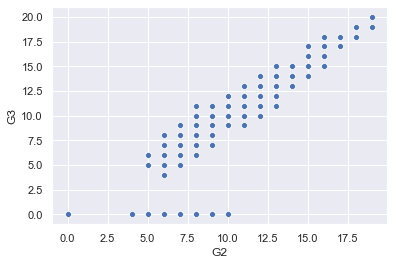

In [135]:
sns.set(style="darkgrid")
sns.scatterplot(studperf_df['G2'] , studperf_df['G3'])
plt.show()


The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


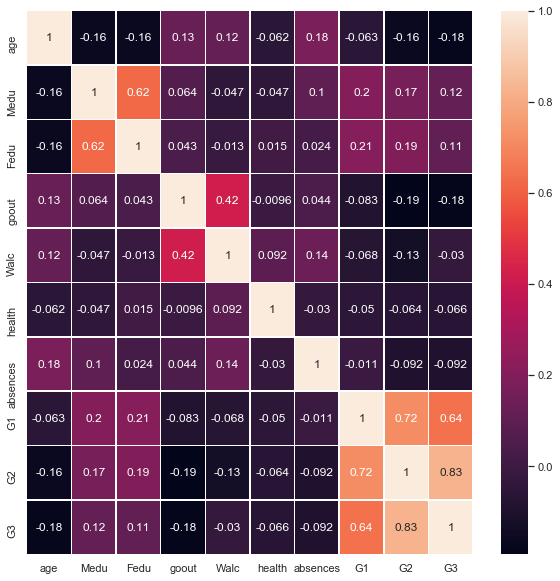

In [132]:
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(studperfVAR_df.corr(), annot=True, linewidths=.5, ax=ax)
plt.show()

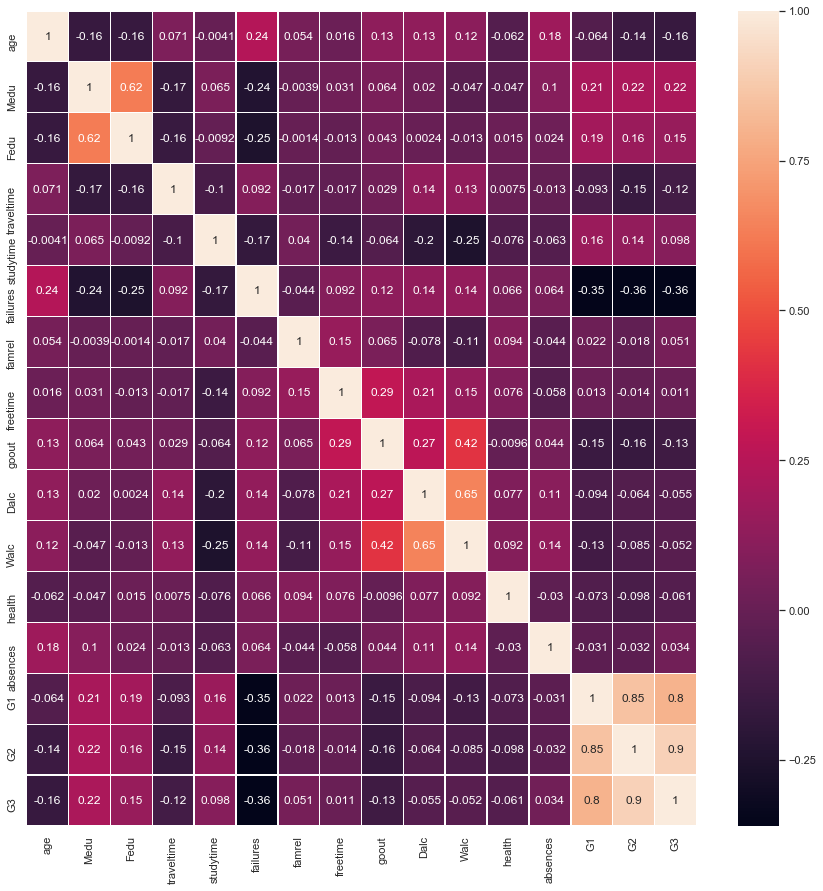

In [134]:
fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
sns.heatmap(studperf_df.corr(), annot=True, linewidths=.5, ax=ax)
plt.show()

## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.*

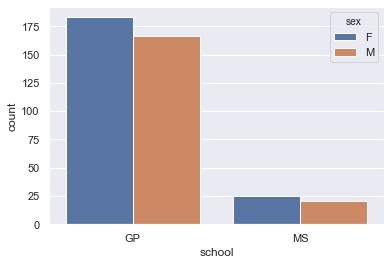

In [128]:
sns.countplot(x='school',hue='sex',data=studperf_df)
plt.show()

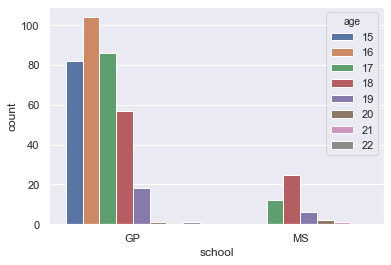

In [99]:
sns.countplot(x='school',hue='age',data=studperf_df)

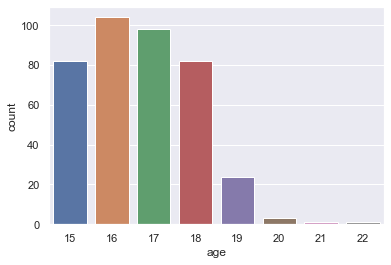

In [100]:
sns.countplot(x='age',data=studperf_df)

## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [112]:
#X.info()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=1)

In [113]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 106 to 37
Data columns (total 9 columns):
age         300 non-null int64
Medu        300 non-null int64
Fedu        300 non-null int64
goout       300 non-null int64
Walc        300 non-null int64
health      300 non-null int64
absences    300 non-null int64
G1          300 non-null int32
G2          300 non-null int32
dtypes: int32(2), int64(7)
memory usage: 21.1 KB


In [114]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95 entries, 146 to 242
Data columns (total 9 columns):
age         95 non-null int64
Medu        95 non-null int64
Fedu        95 non-null int64
goout       95 non-null int64
Walc        95 non-null int64
health      95 non-null int64
absences    95 non-null int64
G1          95 non-null int32
G2          95 non-null int32
dtypes: int32(2), int64(7)
memory usage: 6.7 KB


In [117]:
y_train.count()

300

In [118]:
y_test.count()

95

## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [138]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))

0.9052631578947369
[[24  4]
 [ 5 62]]


C:\Users\vybreddy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [139]:
y_known_predict = model.predict(X_train)
known_model_score = model.score(X_train, y_train)
print(known_model_score)
print(metrics.confusion_matrix(y_train, y_known_predict))

0.92
[[ 95   7]
 [ 17 181]]


In [143]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.91


In [144]:
print('Accuracy of logistic regression classifier on training set: {:.2f}'.format(model.score(X_train, y_train)))

Accuracy of logistic regression classifier on training set: 0.92


In [145]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84        28
           1       0.94      0.93      0.93        67

    accuracy                           0.91        95
   macro avg       0.88      0.89      0.89        95
weighted avg       0.91      0.91      0.91        95



In [146]:
print("F1 Score test set is : ", metrics.f1_score(y_test,y_predict)) 

F1 Score is :  0.9323308270676692


In [147]:
print("F1 Score training set is : ", metrics.f1_score(y_train,y_known_predict)) 

F1 Score training set is :  0.9378238341968912


# Naive bayes with Iris data

### Import Iris.csv

In [162]:
colnames = ["Sepal Length (in cm)","Sepal Width in (cm)","Petal length (in cm)","Petal width (in cm)","Species"]

In [163]:
iris_df = pd.read_csv("Iris.csv", names = colnames , skiprows = 1)

In [164]:
iris_df.head()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [165]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal Length (in cm)    150 non-null float64
Sepal Width in (cm)     150 non-null float64
Petal length (in cm)    150 non-null float64
Petal width (in cm)     150 non-null float64
Species                 150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [166]:
array = iris_df.values
X=array[:,:3]
y=array[:,4]

In [167]:
X

array([[5.1, 3.5, 1.4],
       [4.9, 3.0, 1.4],
       [4.7, 3.2, 1.3],
       [4.6, 3.1, 1.5],
       [5.0, 3.6, 1.4],
       [5.4, 3.9, 1.7],
       [4.6, 3.4, 1.4],
       [5.0, 3.4, 1.5],
       [4.4, 2.9, 1.4],
       [4.9, 3.1, 1.5],
       [5.4, 3.7, 1.5],
       [4.8, 3.4, 1.6],
       [4.8, 3.0, 1.4],
       [4.3, 3.0, 1.1],
       [5.8, 4.0, 1.2],
       [5.7, 4.4, 1.5],
       [5.4, 3.9, 1.3],
       [5.1, 3.5, 1.4],
       [5.7, 3.8, 1.7],
       [5.1, 3.8, 1.5],
       [5.4, 3.4, 1.7],
       [5.1, 3.7, 1.5],
       [4.6, 3.6, 1.0],
       [5.1, 3.3, 1.7],
       [4.8, 3.4, 1.9],
       [5.0, 3.0, 1.6],
       [5.0, 3.4, 1.6],
       [5.2, 3.5, 1.5],
       [5.2, 3.4, 1.4],
       [4.7, 3.2, 1.6],
       [4.8, 3.1, 1.6],
       [5.4, 3.4, 1.5],
       [5.2, 4.1, 1.5],
       [5.5, 4.2, 1.4],
       [4.9, 3.1, 1.5],
       [5.0, 3.2, 1.2],
       [5.5, 3.5, 1.3],
       [4.9, 3.1, 1.5],
       [4.4, 3.0, 1.3],
       [5.1, 3.4, 1.5],
       [5.0, 3.5, 1.3],
       [4.5, 2.3

In [168]:
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

### Find the distribution of target variable (Class)

In [169]:
iris_df.groupby(['Species']).count()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm)
Species,,,,
Iris-setosa,50,50,50,50
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


### Plot the distribution of target variable using histogram

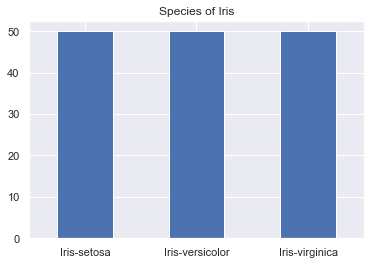

In [174]:
pd.value_counts(iris_df["Species"]).plot(kind="bar")
plt.title('Species of Iris')
plt.xticks(rotation=360)
plt.show()

### Plot Scatter Matrix to understand the distribution of variables and give insights from it (1 Marks)

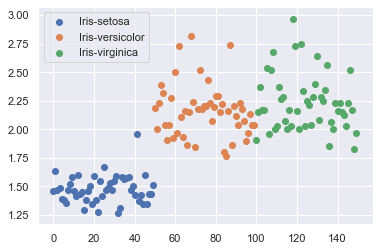

In [179]:
ratio = iris_df["Sepal Length (in cm)"]/iris_df["Sepal Width in (cm)"]

for name, group in iris_df.groupby("Species"):
    plt.scatter(group.index, ratio[group.index], label=name)

plt.legend()
plt.show()

From above , we infer that three species or classes "Iris-setosa" , "Iris-versicolor" and "Iris-vifginica" have clear differences in there characteristics like "Sepal Length","Sepal Width","Petal Length","Petal Width" and can be easily separated or classified from one another.

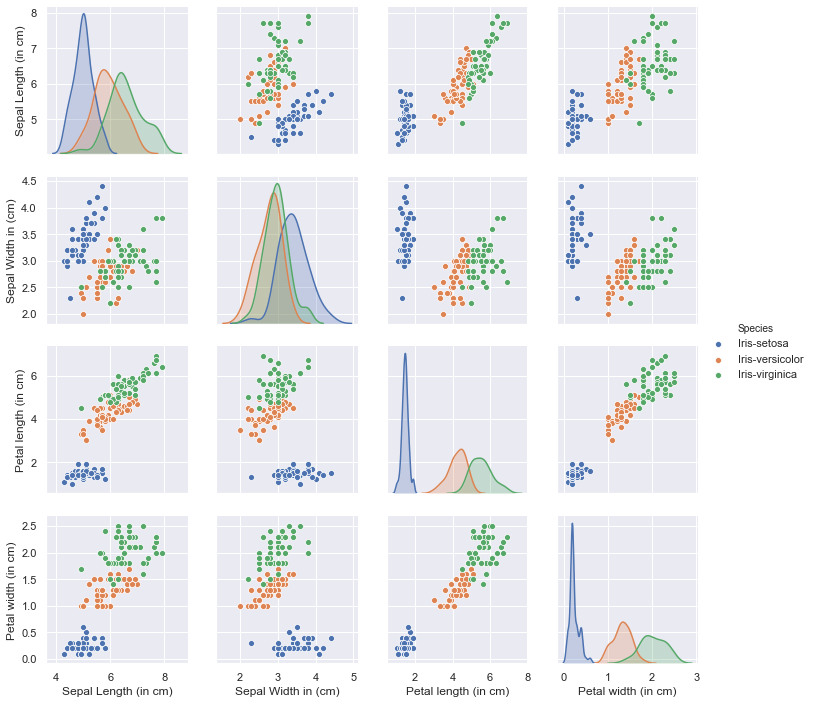

In [181]:
sns.pairplot(iris_df , hue='Species')
plt.show()

### Summary Statistics and explain insights for at least 2 variables

In [188]:
iris_df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Sepal Length (in cm),150,NaN,NaN,NaN,5.84333,0.828066,4.3,5.1,5.8,6.4,7.9
Sepal Width in (cm),150,NaN,NaN,NaN,3.054,0.433594,2,2.8,3,3.3,4.4
Petal length (in cm),150,NaN,NaN,NaN,3.75867,1.76442,1,1.6,4.35,5.1,6.9
Petal width (in cm),150,NaN,NaN,NaN,1.19867,0.763161,0.1,0.3,1.3,1.8,2.5
Species,150,3,Iris-setosa,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [189]:
iris_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sepal Length (in cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
Sepal Width in (cm),150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
Petal length (in cm),150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
Petal width (in cm),150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


We can see that all of the numerical values have the same scale (centimeters) and similar ranges between 0 and 8 centimeters.

### Correlation among all variables and give your insights

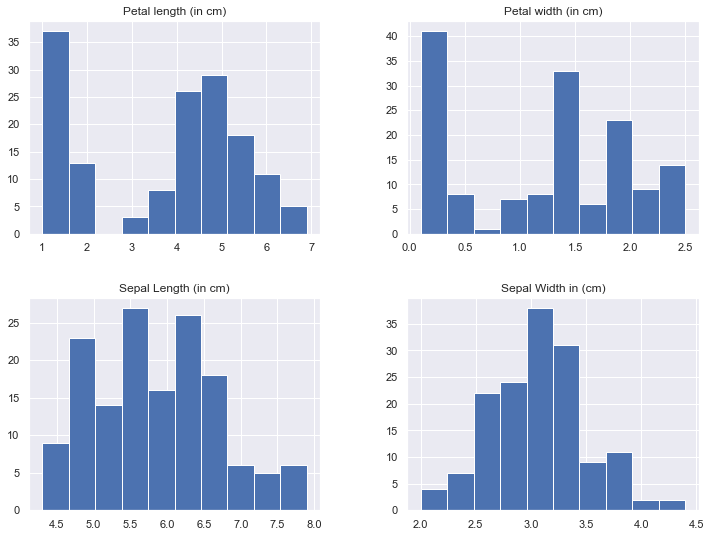

In [199]:
import matplotlib.pyplot as plt
 
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
#print ("Current size:", fig_size)

 # Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

iris_df.hist()
plt.show()

It looks like perhaps two of the input variables have a Gaussian distribution. This is useful to note as we can use algorithms that can exploit this assumption.

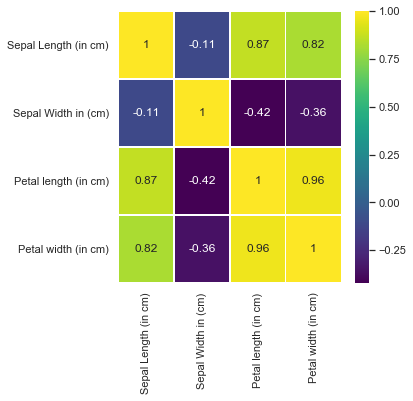

In [200]:
fig, ax = plt.subplots(figsize=(5,5))         # Sample figsize in inches
sns.heatmap(iris_df.corr(), annot=True, cmap='viridis', linewidths=.5, ax=ax)
plt.show()

There is a high correlation between "Sepal Length" and "Petal Length" attributes , and also between "Petal Width" and "Petal Length" attributes.

### Split data in Training and Validation in 80:20

In [216]:
from sklearn import model_selection
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

test_size = 0.20 # taking 80:20 training and test set
seed = 9  # Random numbmer seeding for reapeatability of the code

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)

In [217]:
n_train = len(X_train)
n_test = len(X_test)
print ()
print ("{} samples in the training set".format(n_train))
print ("{} samples in the test set".format(n_test))


120 samples in the training set
30 samples in the test set


### Do Feature Scaling

In [206]:
from sklearn import preprocessing
X = preprocessing.scale(X)

### Train and Fit NaiveBayes Model

In [218]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [219]:
# make known predictions
known = y_train
knownpredicted = model.predict(X_train)
# summarize the fit of the model
print(metrics.classification_report(known, knownpredicted))
print(metrics.confusion_matrix(known, knownpredicted))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        37
Iris-versicolor       0.76      0.85      0.80        41
 Iris-virginica       0.84      0.74      0.78        42

       accuracy                           0.86       120
      macro avg       0.87      0.86      0.86       120
   weighted avg       0.86      0.86      0.86       120

[[37  0  0]
 [ 0 35  6]
 [ 0 11 31]]


In [220]:
# make predictions
expected = y_test
predicted = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.90      1.00      0.95         9
 Iris-virginica       1.00      0.88      0.93         8

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.96        30
   weighted avg       0.97      0.97      0.97        30

[[13  0  0]
 [ 0  9  0]
 [ 0  1  7]]


### Print Accuracy and Confusion Matrix and Conclude your findings

In [221]:
print('Accuracy of Naive Bayes classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))

Accuracy of Naive Bayes classifier on test set: 0.97


In [222]:
print('Confusion Matrix of Naive Bayes classifier on test set: ')
print (metrics.confusion_matrix(expected, predicted))

Confusion Matrix of Naive Bayes classifier on test set: 
[[13  0  0]
 [ 0  9  0]
 [ 0  1  7]]


The accuracy is 0.97 or 97%. The confusion matrix provides an indication of the three errors made. Finally, the classification report provides a breakdown of each class by precision, recall, f1-score and support showing excellent results.

In [223]:
print("That's All Folks !!!")

That's All Folks !!!
